In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
!pip install tensorflow

In [ ]:
!pip install transformers datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [5]:
from datasets import load_dataset, DatasetDict
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = load_dataset("glue", "cola")
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 8551
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1043
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1063
    })
})

In [6]:
# Download GLUE (including CoLA)
glue_dataset = load_dataset("glue", "cola")

# Save to disk (choose a convenient format like parquet or arrow)
format = "parquet" #or "arrow"
glue_dataset.save_to_disk(f"glue.{format}")

Saving the dataset (0/1 shards):   0%|          | 0/8551 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1043 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1063 [00:00<?, ? examples/s]

## 1. Know the `cola` dataset

In [61]:
train_df = dataset["train"].to_pandas()
validation_df = dataset["validation"].to_pandas()
test_df = dataset["test"].to_pandas()

## Save the first `100` rows to a `csv` files

In [65]:
# first_100_rows = train_df.head(100)
# first_100_rows.to_csv('../data/cola_example.csv', index=False)

In [5]:
train_df.head(10)

,sentence,label,idx
0,"Our friends won't buy this analysis, let alone...",1,0
1,One more pseudo generalization and I'm giving up.,1,1
2,One more pseudo generalization or I'm giving up.,1,2
3,"The more we study verbs, the crazier they get.",1,3
4,Day by day the facts are getting murkier.,1,4
5,I'll fix you a drink.,1,5
6,Fred watered the plants flat.,1,6
7,Bill coughed his way out of the restaurant.,1,7
8,We're dancing the night away.,1,8
9,Herman hammered the metal flat.,1,9


In [13]:
test_df.describe()

,label,idx
count,1063.0,1063.000000
mean,-1.0,531.000000
std,0.0,307.005972
min,-1.0,0.000000
25%,-1.0,265.500000
50%,-1.0,531.000000
75%,-1.0,796.500000
max,-1.0,1062.000000


In [14]:
test_df.shape

(1063, 3)

In [6]:
dataset["train"][0]["sentence"]

"Our friends won't buy this analysis, let alone the next one we propose."

## 2. Class Distribution Analysis:

In [7]:
# Function to plot class distributions
def plot_class_distribution(df, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x="label", data=df)
    plt.title(f"Class Distribution: {title}")
    plt.xlabel("Label (0: Unacceptable, 1: Acceptable)")
    plt.ylabel("Count")
    plt.show()

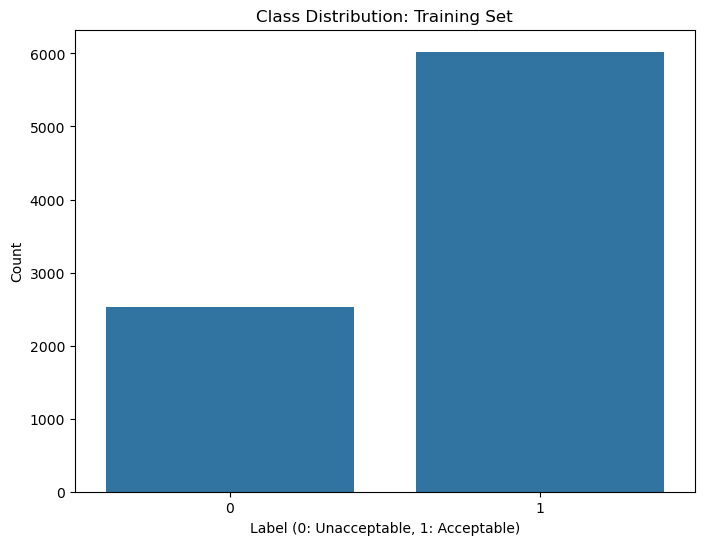

In [8]:
plot_class_distribution(train_df, "Training Set")

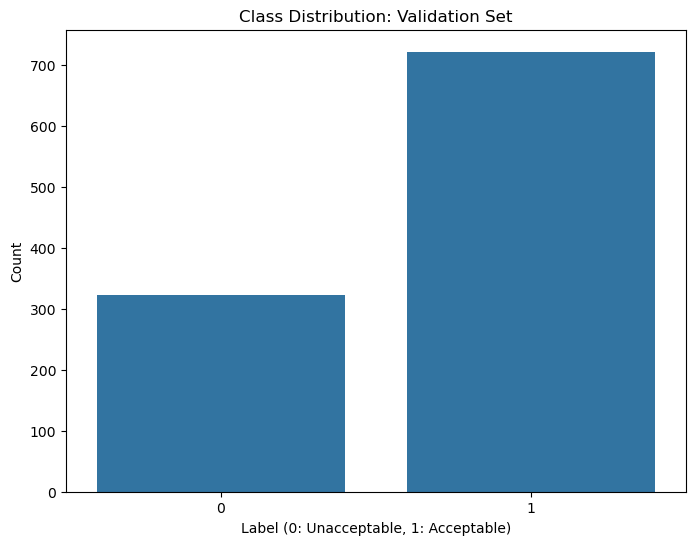

In [9]:
plot_class_distribution(validation_df, "Validation Set")

In [ ]:
# Calculate and print class proportions
def print_class_proportions(df, title):
  proportions = df["label"].value_counts(normalize=True) * 100
  print(f"Class Proportions: {title}")
  print(proportions)

print_class_proportions(train_df, "Training Set")
print()
print_class_proportions(validation_df, "Validation Set")
print()
print_class_proportions(test_df, "Test Set")

Class Proportions: Training Set
label
1    70.436206
0    29.563794
Name: proportion, dtype: float64

Class Proportions: Validation Set
label
1    69.127517
0    30.872483
Name: proportion, dtype: float64

Class Proportions: Test Set
label
-1    100.0
Name: proportion, dtype: float64


## 3. Sentence Length Analysis

In [15]:
# Function to analyze and plot sentence lengths
def analyze_sentence_length(df, title):
    df["sentence_length"] = df["sentence"].str.split().str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(df["sentence_length"], kde=True)
    plt.title(f"Sentence Length Distribution: {title}")
    plt.xlabel("Sentence Length (Number of Words)")
    plt.ylabel("Frequency")
    plt.show()
    print(f"Descriptive Statistics for Sentence Length: {title}")
    print(df["sentence_length"].describe())

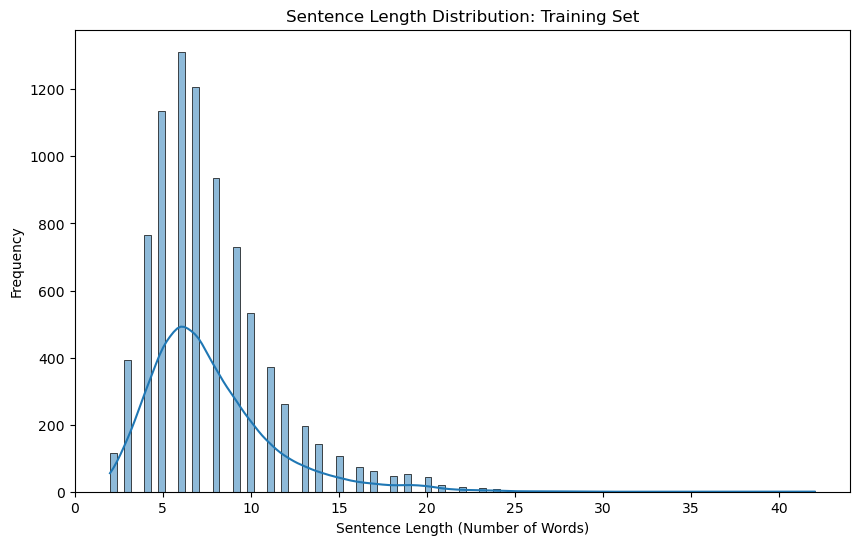

Descriptive Statistics for Sentence Length: Training Set
count    8551.000000
mean        7.696410
std         3.623411
min         2.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        42.000000
Name: sentence_length, dtype: float64


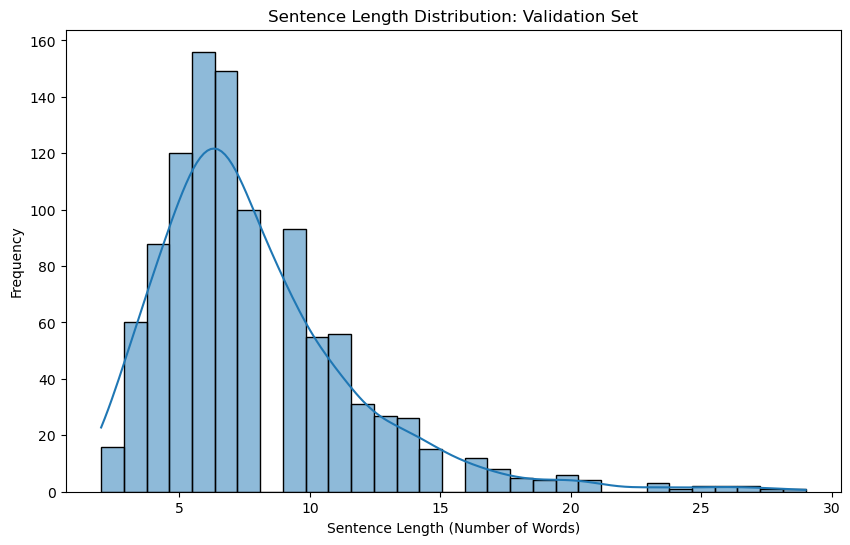

Descriptive Statistics for Sentence Length: Validation Set
count    1043.000000
mean        7.921381
std         3.997306
min         2.000000
25%         5.000000
50%         7.000000
75%         9.500000
max        29.000000
Name: sentence_length, dtype: float64


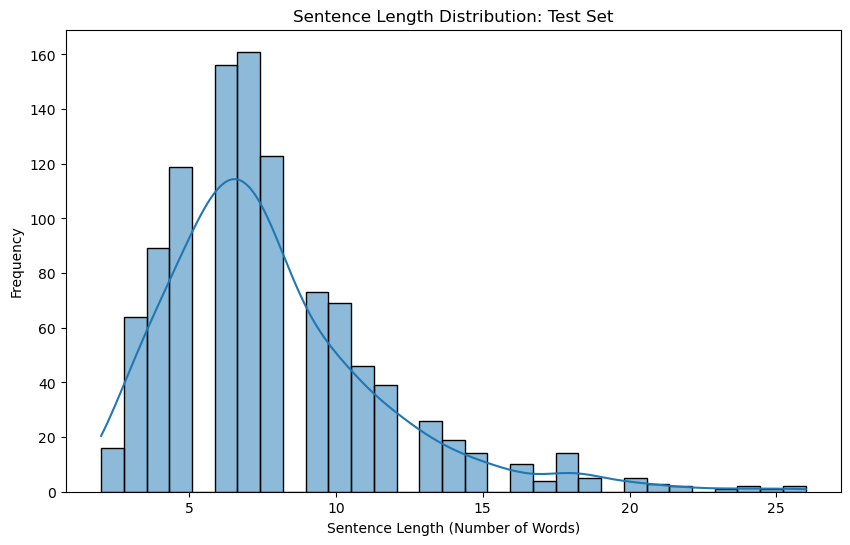

Descriptive Statistics for Sentence Length: Test Set
count    1063.000000
mean        7.795861
std         3.768326
min         2.000000
25%         5.000000
50%         7.000000
75%         9.000000
max        26.000000
Name: sentence_length, dtype: float64


In [16]:
analyze_sentence_length(train_df, "Training Set")
analyze_sentence_length(validation_df, "Validation Set")
analyze_sentence_length(test_df, "Test Set")

## 4. Word Frequency Analysis

In [21]:
from collections import Counter

def analyze_word_frequency(df, title, n=1):
    all_words = " ".join(df["sentence"]).lower().split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(20) # Show top 20
    print(f"Most Common {n}-grams: {title}")
    print(common_words, '\n')

In [22]:
analyze_word_frequency(train_df, "Training Set")
analyze_word_frequency(validation_df, "Validation Set")
analyze_word_frequency(test_df, "Validation Set")

Most Common 1-grams: Training Set
[('the', 5458), ('to', 2118), ('a', 1369), ('that', 1240), ('i', 1212), ('is', 1067), ('john', 906), ('of', 808), ('and', 717), ('was', 707), ('in', 694), ('he', 667), ('you', 546), ('it', 477), ('who', 452), ('be', 443), ('on', 408), ('for', 403), ('will', 383), ('mary', 370)] 

Most Common 1-grams: Validation Set
[('the', 590), ('to', 306), ('a', 181), ('i', 173), ('that', 154), ('john', 132), ('is', 119), ('was', 117), ('in', 91), ('and', 90), ('of', 80), ('it', 75), ('be', 69), ('but', 67), ('we', 63), ('bill', 62), ('which', 61), ('by', 60), ('on', 59), ('you', 56)] 

Most Common 1-grams: Validation Set
[('the', 592), ('to', 291), ('i', 175), ('that', 174), ('a', 149), ('is', 142), ('was', 117), ('john', 113), ('and', 112), ('it', 82), ('of', 78), ('by', 73), ('in', 71), ('we', 67), ('on', 66), ('be', 58), ('for', 58), ('but', 58), ('he', 53), ('bill', 50)] 



## 5. Part-of-Speech (POS) Tagging and Analysis

In [24]:
import nltk
nltk.download('averaged_perceptron_tagger_eng') # Download POS tagger if needed.
from nltk import pos_tag

def analyze_pos_tags(df, title):
    df['pos_tags'] = df['sentence'].apply(lambda x: [tag for word, tag in pos_tag(x.split())])
    pos_counts = {}
    for index, row in df.iterrows():
        for tag in row["pos_tags"]:
            pos_counts[tag] = pos_counts.get(tag, 0) + 1

    #convert pos_counts into dataframe.
    pos_df = pd.DataFrame.from_dict(pos_counts, orient='index',columns=['counts'])
    pos_df = pos_df.sort_values('counts', ascending=False)

    plt.figure(figsize=(12,6))
    sns.barplot(x=pos_df.index, y=pos_df['counts'])
    plt.xticks(rotation=90)
    plt.title(f'Part-of-Speech Tag Distribution: {title}')
    plt.show()
    print(f"Top 10 POS tags in {title}")
    print(pos_df.head(10))

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/nagiur/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


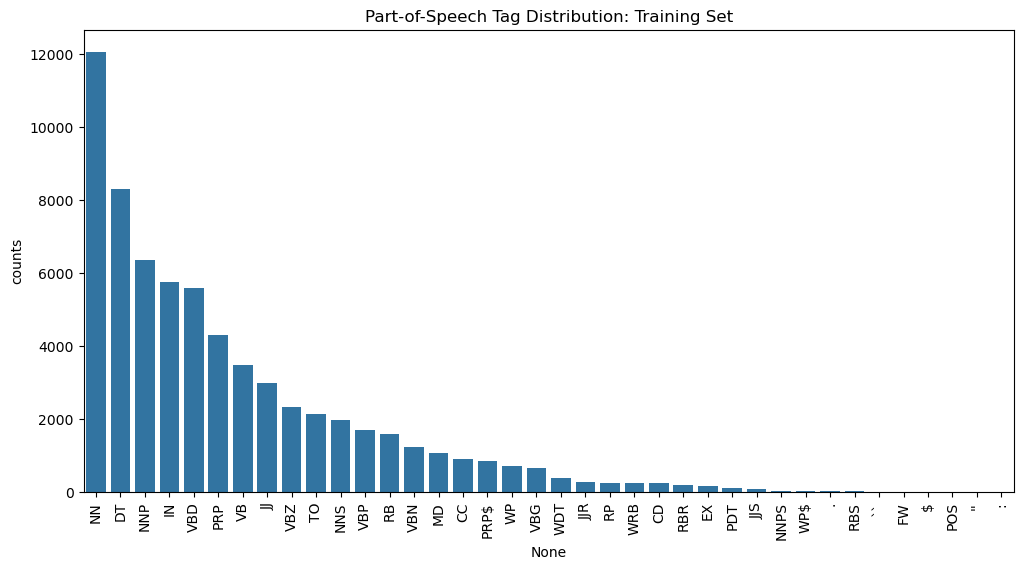

Top 10 POS tags in Training Set
     counts
NN    12052
DT     8291
NNP    6352
IN     5757
VBD    5570
PRP    4302
VB     3469
JJ     2968
VBZ    2330
TO     2118


In [25]:
analyze_pos_tags(train_df,"Training Set")

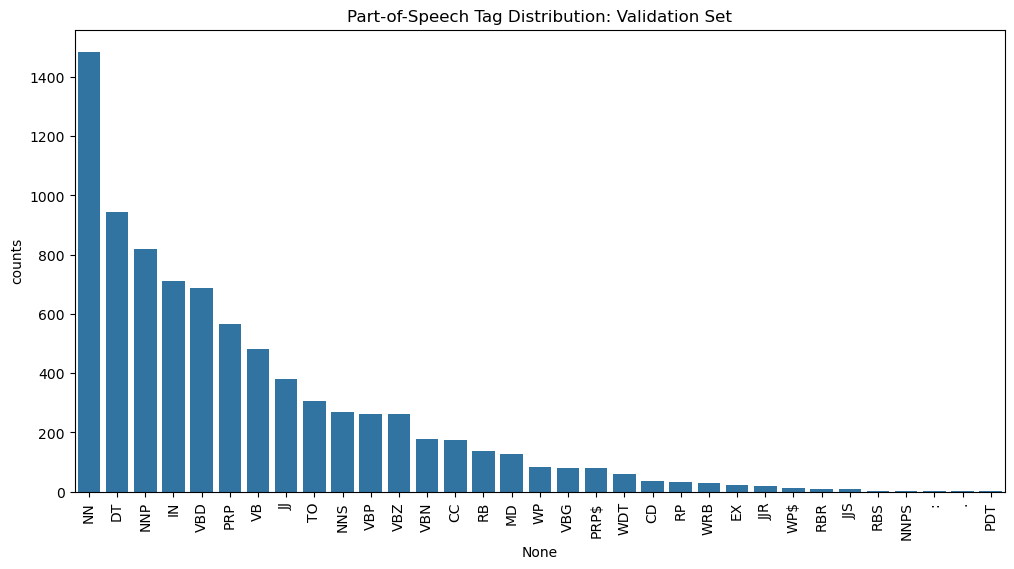

Top 10 POS tags in Validation Set
     counts
NN     1485
DT      945
NNP     819
IN      710
VBD     686
PRP     566
VB      482
JJ      381
TO      306
NNS     270


In [27]:
analyze_pos_tags(validation_df,"Validation Set")

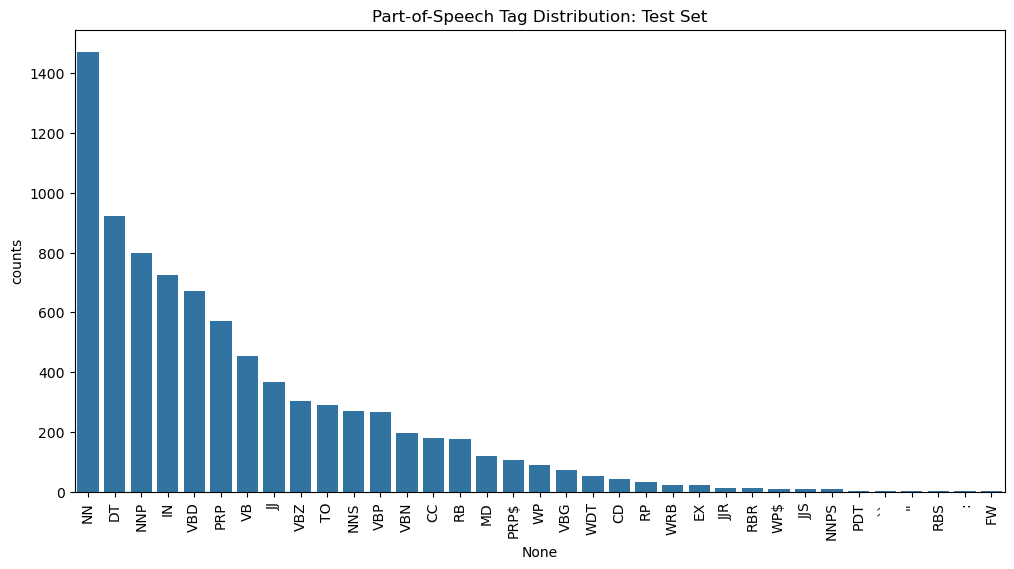

Top 10 POS tags in Test Set
     counts
NN     1472
DT      921
NNP     799
IN      724
VBD     672
PRP     572
VB      455
JJ      367
VBZ     305
TO      291


In [27]:
analyze_pos_tags(test_df,"Test Set")

## 6. Syntactic Complexity Analysis

In [28]:
import spacy
# spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm") # Load a spaCy model

def analyze_syntactic_complexity(df, title):
    df['sentence_length'] = df['sentence'].apply(lambda x: len(x.split()))
    df['num_clauses'] = df['sentence'].apply(lambda x: len(list(nlp(x).sents)))

    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='sentence_length', hue='label', kde=True, element="step")
    plt.title(f'Sentence Length Distribution by Acceptability: {title}')
    plt.show()

    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x='num_clauses', hue='label', kde=True, element="step")
    plt.title(f'Number of Clauses Distribution by Acceptability: {title}')
    plt.show()

    print(df.groupby("label")[["sentence_length", "num_clauses"]].describe())

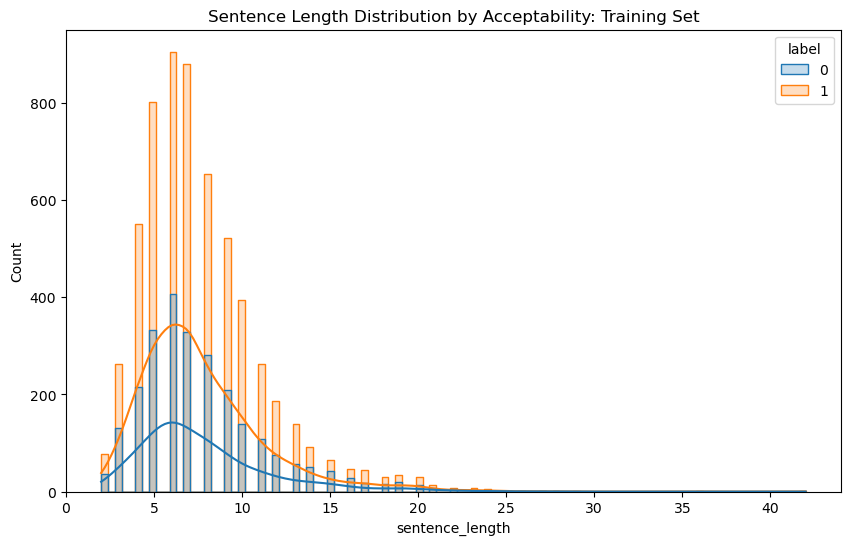

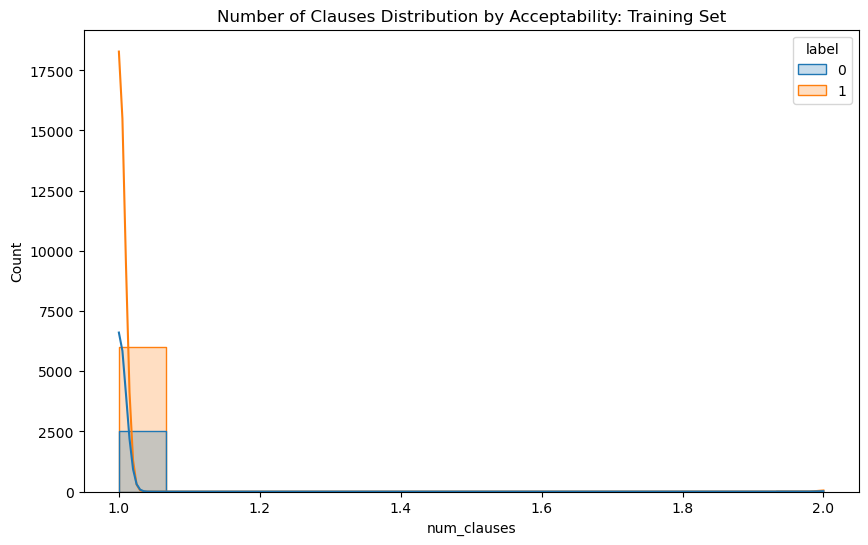

      sentence_length                                                \
                count      mean       std  min  25%  50%  75%   max   
label                                                                 
0              2528.0  7.768987  3.766592  2.0  5.0  7.0  9.0  28.0   
1              6023.0  7.665947  3.561480  2.0  5.0  7.0  9.0  42.0   

      num_clauses                                               
            count      mean       std  min  25%  50%  75%  max  
label                                                           
0          2528.0  1.002373  0.048670  1.0  1.0  1.0  1.0  2.0  
1          6023.0  1.002490  0.049846  1.0  1.0  1.0  1.0  2.0  


In [29]:
analyze_syntactic_complexity(train_df, "Training Set")

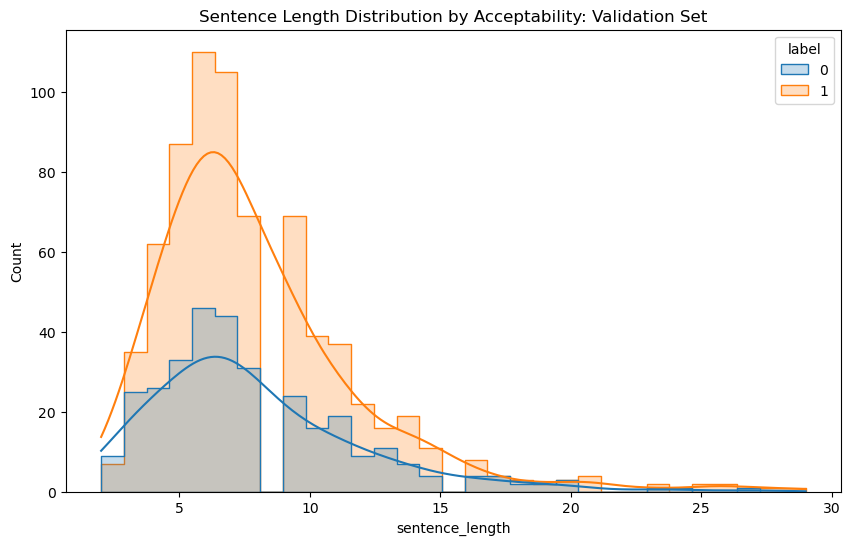

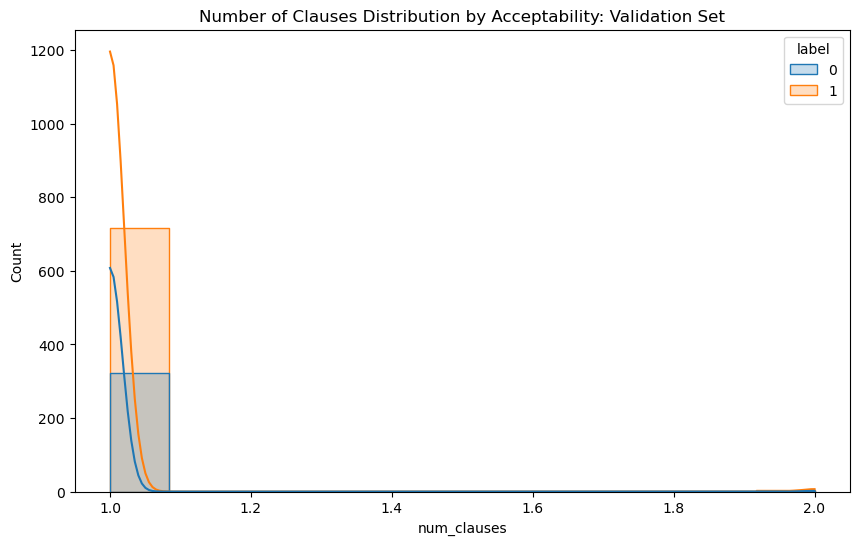

      sentence_length                                                 \
                count      mean       std  min  25%  50%   75%   max   
label                                                                  
0               322.0  7.850932  4.065218  2.0  5.0  7.0  10.0  27.0   
1               721.0  7.952843  3.969046  2.0  5.0  7.0   9.0  29.0   

      num_clauses                                               
            count      mean       std  min  25%  50%  75%  max  
label                                                           
0           322.0  1.003106  0.055728  1.0  1.0  1.0  1.0  2.0  
1           721.0  1.005548  0.074329  1.0  1.0  1.0  1.0  2.0  


In [30]:
analyze_syntactic_complexity(validation_df, "Validation Set")

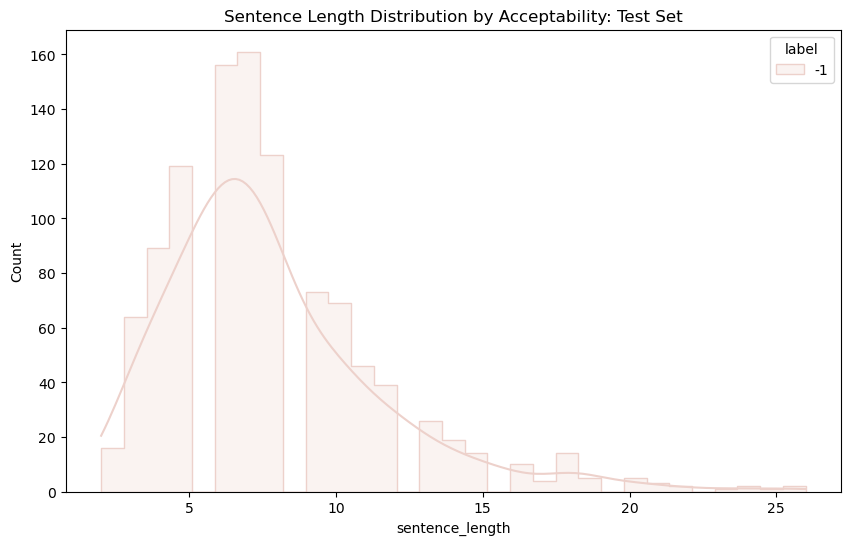

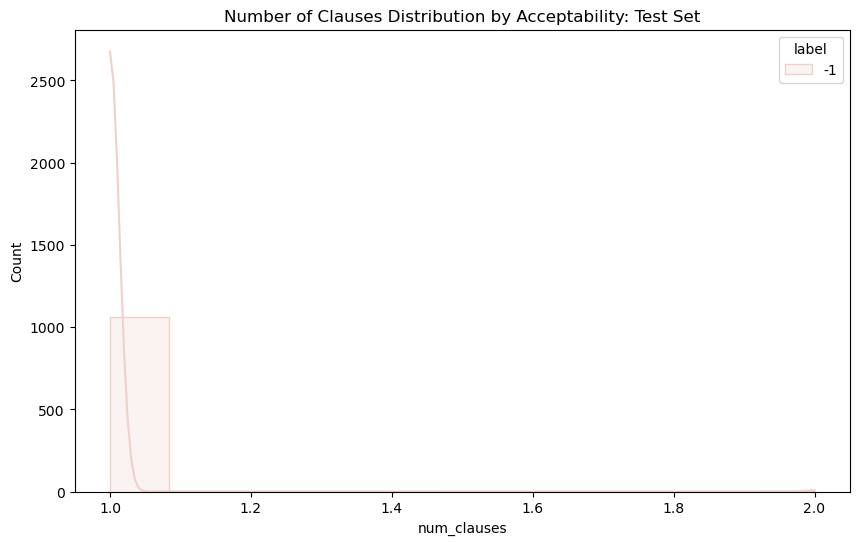

      sentence_length                                                \
                count      mean       std  min  25%  50%  75%   max   
label                                                                 
-1             1063.0  7.795861  3.768326  2.0  5.0  7.0  9.0  26.0   

      num_clauses                                               
            count      mean       std  min  25%  50%  75%  max  
label                                                           
-1         1063.0  1.002822  0.053074  1.0  1.0  1.0  1.0  2.0  


In [31]:
analyze_syntactic_complexity(test_df, "Test Set")

## 7. Rare Word Analysis

### Method - 1: Simple Frequency Count

In [41]:
from collections import Counter

def analyze_rare_words(df, title, threshold=5): # Adjust threshold as needed
    all_words = " ".join(df["sentence"]).lower().split()
    word_counts = Counter(all_words)
    rare_words = {word: count for word, count in word_counts.items() if count <= threshold}
    print(f"Rare Words (appearing {threshold} times or less): {title}")
    print(f"Number of rare words: {len(rare_words)}")
    print(f"Top 20 rare words: {Counter(rare_words).most_common(20)}")
    return rare_words

In [46]:
rare_words_train = analyze_rare_words(train_df, "Training Set", threshold=2)

Rare Words (appearing 2 times or less): Training Set
Number of rare words: 4879
Top 20 rare words: [('analysis,', 2), ('pseudo', 2), ('generalization', 2), ('crazier', 2), ('stage.', 2), ('froze', 2), ('solid.', 2), ('pieces.', 2), ('leaked', 2), ('flat', 2), ('whistled', 2), ('vanished.', 2), ('wider', 2), ('taller.', 2), ('trail', 2), ('weights', 2), ('squeezed', 2), ('puppet', 2), ('ted', 2), ('tiger', 2)]


In [47]:
rare_words_val = analyze_rare_words(validation_df, "Validation Set", threshold=2)

Rare Words (appearing 2 times or less): Validation Set
Number of rare words: 1793
Top 20 rare words: [('over', 2), ('most,', 2), ('eat.', 2), ('gets', 2), ('looked', 2), ('appear', 2), ('senator', 2), ('talks', 2), ('working.', 2), ('life', 2), ('lot', 2), ('win.', 2), ('box', 2), ('bubbled', 2), ('leaked', 2), ('bottle', 2), ('fill', 2), ('free.', 2), ('lay', 2), ('probably', 2)]


In [48]:
rare_words_test = analyze_rare_words(test_df, "Test Set", threshold=2)

Rare Words (appearing 2 times or less): Test Set
Number of rare words: 1782
Top 20 rare words: [('mine', 2), ('are.', 2), ('of.', 2), ('left,', 2), ('fred', 2), ('succumb', 2), ('corruption.', 2), ('solve,', 2), ('satisfy', 2), ('folks', 2), ('corporate', 2), ('she?', 2), ('mickey', 2), ('proved', 2), ('great', 2), ('riot', 2), ('obnoxious,', 2), ('seems.', 2), ('heart', 2), ('hate', 2)]


### Method - 2: TF-IDF for Discriminative Rare Words

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

def analyze_discriminative_rare_words(df, title, threshold=0.1): # Adjust threshold as needed
  vectorizer = TfidfVectorizer(max_df=0.95, min_df=2) # Consider removing stop words here as well.
  X = vectorizer.fit_transform(df["sentence"])
  feature_names = vectorizer.get_feature_names_out()
  df_tfidf = pd.DataFrame(data=X.toarray(), columns=feature_names)
  df_tfidf['label'] = df['label']

  #Get words with tfidf >= threshold.
  rare_words = []
  for col in df_tfidf.columns:
    if col not in ['label']:
      rare_words.extend(list(df_tfidf.loc[df_tfidf[col] >= threshold, col].index))

  print(f"Discriminative Rare Words (tfidf >= {threshold}): {title}")
  print(f"Number of Discriminative Rare Words: {len(rare_words)}")
  print(f"Top 20 Discriminative Rare Words: {Counter(rare_words).most_common(20)}")

In [55]:
analyze_discriminative_rare_words(train_df, "Training Set", threshold=0.2)

Discriminative Rare Words (tfidf >= 0.2): Training Set
Number of Discriminative Rare Words: 49257
Top 20 Discriminative Rare Words: [(1747, 14), (1731, 13), (208, 13), (7129, 13), (7132, 13), (7133, 13), (7134, 13), (1705, 12), (303, 12), (306, 12), (257, 12), (258, 12), (7123, 12), (7124, 12), (1781, 12), (1669, 12), (1935, 12), (6595, 12), (2118, 12), (1753, 12)]


In [53]:
analyze_discriminative_rare_words(validation_df, "Validation Set", threshold=0.2)

Discriminative Rare Words (tfidf >= 0.2): Validation Set
Number of Discriminative Rare Words: 5803
Top 20 Discriminative Rare Words: [(586, 14), (589, 14), (583, 13), (584, 13), (599, 13), (89, 12), (673, 12), (590, 12), (594, 12), (601, 12), (592, 12), (595, 12), (551, 12), (676, 12), (556, 12), (557, 12), (558, 12), (561, 12), (593, 12), (723, 12)]


In [54]:
analyze_discriminative_rare_words(test_df, "Test Set", threshold=0.2)

Discriminative Rare Words (tfidf >= 0.2): Test Set
Number of Discriminative Rare Words: 5867
Top 20 Discriminative Rare Words: [(12, 14), (589, 13), (576, 13), (578, 13), (594, 13), (448, 13), (734, 13), (93, 12), (593, 12), (104, 12), (569, 12), (794, 12), (13, 11), (633, 11), (941, 11), (687, 11), (688, 11), (84, 11), (586, 11), (585, 11)]
